# Python GDP and Internet Usage Project

3. Import the required packages with their customary aliases as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

5. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [177]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv', nrows=6867)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


6. Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [178]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4494)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


7. Look at the shape of each DataFrame - how many rows? How many columns?

In [179]:
print(gdp_df.shape)
print(internet_df.shape)

(6867, 4)
(4494, 4)


8. Take a look at the datatypes for the columns in each DataFrame.

In [180]:
print(gdp_df.dtypes)
print(internet_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object
Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


9. Take a look at the last 10 rows of each DataFrame in turn.

In [181]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6857,Zimbabwe,2000,3473.429801,NaN
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN


In [182]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4484,Zimbabwe,2003,6.394786,NaN
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [183]:
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
internet_df = internet_df.drop(columns=['Value Footnotes'])

In [184]:
print(gdp_df.head(5))
print(internet_df.head(5))

  Country or Area  Year        Value
0     Afghanistan  2019  2065.036398
1     Afghanistan  2018  2033.779002
2     Afghanistan  2017  2058.383832
3     Afghanistan  2016  2057.062164
4     Afghanistan  2015  2068.265904
  Country or Area  Year     Value
0     Afghanistan  2014  6.390000
1     Afghanistan  2013  5.900000
2     Afghanistan  2012  5.454545
3     Afghanistan  2011  5.000000
4     Afghanistan  2010  4.000000


11. Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [185]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
print(gdp_df.head(5))

       Country  Year  GDP_Per_Capita
0  Afghanistan  2019     2065.036398
1  Afghanistan  2018     2033.779002
2  Afghanistan  2017     2058.383832
3  Afghanistan  2016     2057.062164
4  Afghanistan  2015     2068.265904


12. Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [186]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})
print(internet_df.head(5))

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [187]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df,on=['Country', 'Year'], how='outer')

14. Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [188]:
print(gdp_and_internet_use.head(5))

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2019     2065.036398                 NaN
1  Afghanistan  2018     2033.779002                 NaN
2  Afghanistan  2017     2058.383832                 NaN
3  Afghanistan  2016     2057.062164                 NaN
4  Afghanistan  2015     2068.265904                 NaN


15. Look at the last five rows to make sure the data is clean and as expected. 

In [189]:
print(gdp_and_internet_use.tail(5))

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
7899   Yemen  1999             NaN            0.056629
7900   Yemen  1998             NaN            0.023323
7901   Yemen  1997             NaN            0.015025
7902   Yemen  1996             NaN            0.000621
7903   Yemen  1990             NaN            0.000000


16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [190]:
subset_gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
print(subset_gdp_and_internet_use)

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
5               Afghanistan  2014     2102.385234            6.390000
10              Afghanistan  2009     1758.904043            3.550000
15              Afghanistan  2004     1200.278256            0.105809
23                  Albania  2014    11623.866679           60.100000
28                  Albania  2009    10346.864199           41.200000
...                     ...   ...             ...                 ...
7867  Virgin Islands (U.S.)  2009             NaN           27.396510
7872  Virgin Islands (U.S.)  2004             NaN           27.377009
7884                  Yemen  2014             NaN           22.550000
7889                  Yemen  2009             NaN            9.960000
7894                  Yemen  2004             NaN            0.881223

[830 rows x 4 columns]


17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [191]:
df_2004 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004])]
df_2009 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2009])]
df_2014 = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2014])]

18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [192]:
df_2014.sort_values(by='Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6870,Andorra,2014,NaN,95.90
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


Answer: Iceland, 98.16%

19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [193]:
df_2014.sort_values(by='Internet_Users_Pct', ascending=True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7078,Dem. People's Rep. of Korea,2014,NaN,0.00
7136,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7673,Somalia,2014,NaN,1.63
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


Answer: Democratic People's Republic of Korea, 0.00%. HM: Eritrea, 0.99%

20. Repeat for 2004 and 2009.

In [194]:
df_2004.sort_values(by='Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6019,Sweden,2004,44496.023401,83.89
2635,Iceland,2004,45145.545658,83.88
1462,Denmark,2004,50607.628971,80.93
4658,Norway,2004,60893.410993,77.69
7399,Korea (Rep. of),2004,NaN,72.70
...,...,...,...,...
6437,Tuvalu,2004,3336.952920,NaN
6617,Upper middle income,2004,8567.061394,NaN
6737,Vietnam,2004,3689.732423,NaN
6767,West Bank and Gaza,2004,4485.525458,NaN


In [195]:
df_2004.sort_values(by='Internet_Users_Pct', ascending=True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7087,Dem. People's Rep. of Korea,2004,NaN,0.000000
4342,Myanmar,2004,1696.881760,0.024337
3545,Liberia,2004,1181.546158,0.031011
6079,Tajikistan,2004,1737.743630,0.077480
15,Afghanistan,2004,1200.278256,0.105809
...,...,...,...,...
6437,Tuvalu,2004,3336.952920,NaN
6617,Upper middle income,2004,8567.061394,NaN
6737,Vietnam,2004,3689.732423,NaN
6767,West Bank and Gaza,2004,4485.525458,NaN


In [196]:
df_2009.sort_values(by='Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2630,Iceland,2009,48177.084123,93.00
4653,Norway,2009,61886.564498,92.08
6014,Sweden,2009,45638.035577,91.00
4443,Netherlands,2009,51772.424928,89.63
3696,Luxembourg,2009,104932.811953,87.31
...,...,...,...,...
6194,The Gambia,2009,2283.183556,NaN
6612,Upper middle income,2009,11212.934078,NaN
6732,Vietnam,2009,4830.304958,NaN
6762,West Bank and Gaza,2009,5250.116075,NaN


In [197]:
df_2009.sort_values(by='Internet_Users_Pct', ascending=True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7082,Dem. People's Rep. of Korea,2009,NaN,0.000000
6224,Timor-Leste,2009,2724.770973,0.185252
4337,Myanmar,2009,2874.780227,0.220000
5439,Sierra Leone,2009,1372.392285,0.260000
922,Cambodia,2009,2603.583778,0.530000
...,...,...,...,...
6194,The Gambia,2009,2283.183556,NaN
6612,Upper middle income,2009,11212.934078,NaN
6732,Vietnam,2009,4830.304958,NaN
6762,West Bank and Gaza,2009,5250.116075,NaN


21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [198]:
df_2014.sort_values(by='GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80
...,...,...,...,...
7760,T.F.Y.R. Macedonia,2014,NaN,68.06
7818,Venezuela,2014,NaN,57.00
7842,Viet Nam,2014,NaN,48.31
7862,Virgin Islands (U.S.),2014,NaN,50.07


Answer: Macao SAR, China, 156,514.13

22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [199]:
df_2014.sort_values(by='GDP_Per_Capita', ascending=True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95
...,...,...,...,...
7760,T.F.Y.R. Macedonia,2014,NaN,68.06
7818,Venezuela,2014,NaN,57.00
7842,Viet Nam,2014,NaN,48.31
7862,Virgin Islands (U.S.),2014,NaN,50.07


Answer: Central African Republic, 822.61

23. Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0, 0.5, 'GDP per Capita')

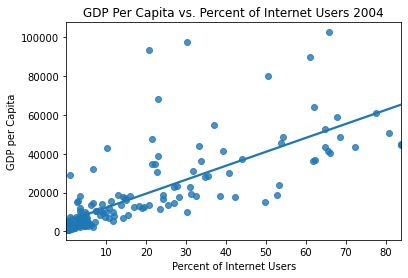

In [371]:
plot_2004 = sns.regplot(x = 'Internet_Users_Pct',
                y = 'GDP_Per_Capita',
                ci = None,
               data = df_2004
                ).set_title('GDP Per Capita vs. Percent of Internet Users 2004')
plt.xlabel('Percent of Internet Users')
plt.ylabel('GDP per Capita')

Text(0, 0.5, 'GDP per Capita')

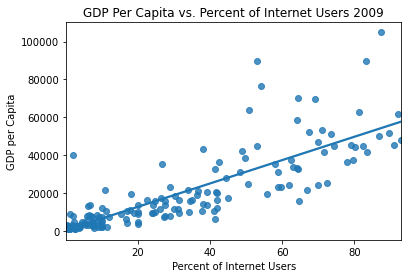

In [372]:
plot_2009 = sns.regplot(x = 'Internet_Users_Pct',
                y = 'GDP_Per_Capita',
                ci = None,
               data = df_2009        
                       ).set_title('GDP Per Capita vs. Percent of Internet Users 2009')
plt.xlabel('Percent of Internet Users')
plt.ylabel('GDP per Capita')

Text(0, 0.5, 'GDP per Capita')

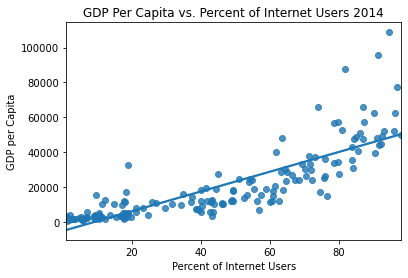

In [373]:
plot_2014 = sns.regplot(x = 'Internet_Users_Pct',
                y = 'GDP_Per_Capita',
                ci = None,
               data = df_2014).set_title('GDP Per Capita vs. Percent of Internet Users 2014')
plt.xlabel('Percent of Internet Users')
plt.ylabel('GDP per Capita')

24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Observations: Across all three years, there seems to be a pretty significant relationship between internet usage and GDP per capita, especially on the lower end. If a country is very poor, it more than likely has a lower internet usage percentage. However, this relationship seems to become less significant over time as the internet becomes more accessible while money, unfortunately, does not. There is still a cluster of low GDP per capita countries in the bottom lefthand corner, but the spread is much wide in 2014 than it is in 2004. 

25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

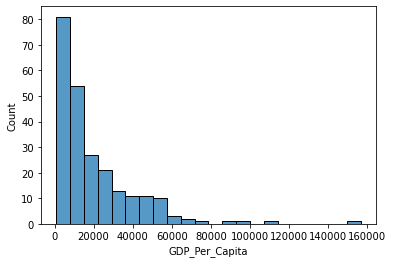

In [216]:
histogram_2014_gdp = sns.histplot(data=df_2014, x = 'GDP_Per_Capita')

Answer: Yes, it is unimodal. 

26. Look at the distribution of Internet Use for 2014. Is it unimodal?

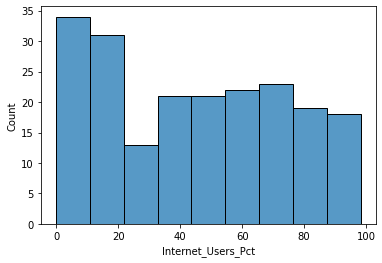

In [218]:
histogram_2014_internet = sns.histplot(data=df_2014, x = 'Internet_Users_Pct')

Answer: No. While not strictly bimodal, this distribution is significantly more bimodal than unimodal. 

27. What are the top 5 countries in terms of internet use in 2014?

In [220]:
df_2014.sort_values(by='Internet_Users_Pct', ascending=False).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6870,Andorra,2014,NaN,95.90


Answer: Iceland, Bermuda, Norway, Denmark, and Andorra.

28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [230]:
top_5_2014 = df_2014.sort_values(by='Internet_Users_Pct', ascending=False).head(5)
top_5_2014 = top_5_2014.drop(columns=['Year', 'GDP_Per_Capita', 'Internet_Users_Pct'])
top_5_internet = pd.merge(top_5_2014,subset_gdp_and_internet_use,on=['Country'], how='inner')
print(top_5_internet)

    Country  Year  GDP_Per_Capita  Internet_Users_Pct
0   Iceland  2014    49652.149500           98.160000
1   Iceland  2009    48177.084123           93.000000
2   Iceland  2004    45145.545658           83.880000
3   Bermuda  2014    77361.104881           96.800000
4   Bermuda  2009    89961.982744           83.250000
5   Bermuda  2004    90195.811033           60.990867
6    Norway  2014    62589.373548           96.300000
7    Norway  2009    61886.564498           92.080000
8    Norway  2004    60893.410993           77.690000
9   Denmark  2014    52214.537753           95.990000
10  Denmark  2009    50274.075696           86.840000
11  Denmark  2004    50607.628971           80.930000
12  Andorra  2014             NaN           95.900000
13  Andorra  2009             NaN           78.530000
14  Andorra  2004             NaN           26.837954


29. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

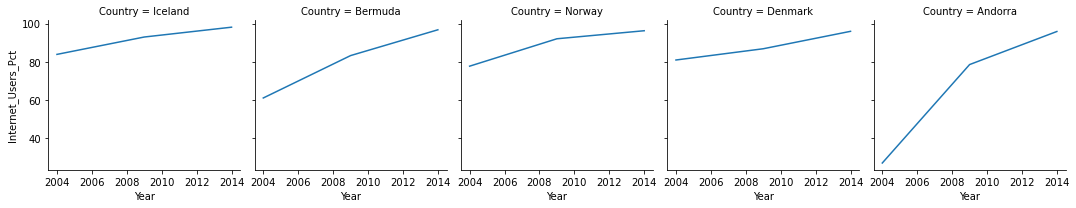

In [243]:
growth = sns.FacetGrid(top_5_internet, col='Country')
growth.map(sns.lineplot, 'Year', 'Internet_Users_Pct')

Answer: Andorra had the greatest growth.

30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [244]:
df_2014.sort_values(by='Internet_Users_Pct', ascending=True).head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7078,Dem. People's Rep. of Korea,2014,NaN,0.00
7136,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7673,Somalia,2014,NaN,1.63


In [246]:
bottom_5_2014 = df_2014.sort_values(by='Internet_Users_Pct', ascending=True).head(5)
bottom_5_2014 = bottom_5_2014.drop(columns=['Year', 'GDP_Per_Capita', 'Internet_Users_Pct'])
bottom_5_internet = pd.merge(bottom_5_2014,subset_gdp_and_internet_use,on=['Country'], how='inner')
print(bottom_5_internet)

                        Country  Year  GDP_Per_Capita  Internet_Users_Pct
0   Dem. People's Rep. of Korea  2014             NaN            0.000000
1   Dem. People's Rep. of Korea  2009             NaN            0.000000
2   Dem. People's Rep. of Korea  2004             NaN            0.000000
3                       Eritrea  2014             NaN            0.990000
4                       Eritrea  2009             NaN            0.540000
5                   Timor-Leste  2014     3264.568070            1.140000
6                   Timor-Leste  2009     2724.770973            0.185252
7                   Timor-Leste  2004     2258.608056                 NaN
8                       Burundi  2014      886.235777            1.380000
9                       Burundi  2009      831.564131            0.900000
10                      Burundi  2004      817.460585            0.349060
11                      Somalia  2014             NaN            1.630000
12                      Somalia  2009 

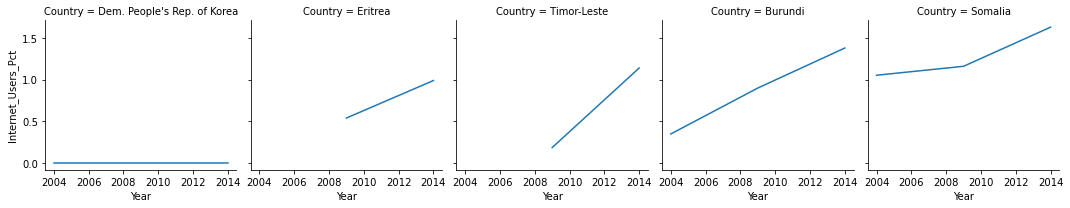

In [247]:
not_growth = sns.FacetGrid(bottom_5_internet, col='Country')
not_growth.map(sns.lineplot, 'Year', 'Internet_Users_Pct')

Answer: Assuming the Korea data is false, Eritrea has the least internet use. 

31. Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [253]:
top_5_gdp_2014 = df_2014.sort_values(by='GDP_Per_Capita', ascending=False).head(5)

In [254]:
top_5_gdp_2014 = top_5_gdp_2014.drop(columns=['Year', 'GDP_Per_Capita', 'Internet_Users_Pct'])
top_5_gdp = pd.merge(top_5_gdp_2014,subset_gdp_and_internet_use,on=['Country'], how='inner')
print(top_5_gdp)

             Country  Year  GDP_Per_Capita  Internet_Users_Pct
0   Macao SAR, China  2014   156514.133850                 NaN
1   Macao SAR, China  2009    95939.340822                 NaN
2   Macao SAR, China  2004    72944.409424                 NaN
3         Luxembourg  2014   108760.916030           94.670000
4         Luxembourg  2009   104932.811953           87.310000
5         Luxembourg  2004   102708.212547           65.880000
6              Qatar  2014    95578.416973           91.490000
7              Qatar  2009    89954.519993           53.100000
8              Qatar  2004    93748.301216           20.701648
9          Singapore  2014    87808.663157           82.000000
10         Singapore  2009    69466.581746           69.000000
11         Singapore  2004    63901.716368           62.000000
12           Bermuda  2014    77361.104881           96.800000
13           Bermuda  2009    89961.982744           83.250000
14           Bermuda  2004    90195.811033           60

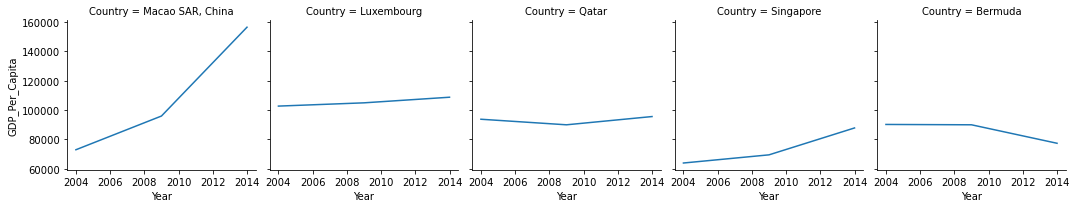

In [256]:
gdp_trend = sns.FacetGrid(top_5_gdp, col='Country')
gdp_trend.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

32. Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [257]:
bottom_5_gdp_2014 = df_2014.sort_values(by='GDP_Per_Capita', ascending=True).head(5)

In [258]:
bottom_5_gdp_2014 = bottom_5_gdp_2014.drop(columns=['Year', 'GDP_Per_Capita', 'Internet_Users_Pct'])
bottom_5_gdp = pd.merge(bottom_5_gdp_2014,subset_gdp_and_internet_use,on=['Country'], how='inner')
print(bottom_5_gdp)

                     Country  Year  GDP_Per_Capita  Internet_Users_Pct
0   Central African Republic  2014      822.610458                 NaN
1   Central African Republic  2009     1161.189475                 NaN
2   Central African Republic  2004     1037.846766                 NaN
3                    Burundi  2014      886.235777            1.380000
4                    Burundi  2009      831.564131            0.900000
5                    Burundi  2004      817.460585            0.349060
6                     Malawi  2014     1027.208496            5.830000
7                     Malawi  2009      932.867635            1.070000
8                     Malawi  2004      775.346132            0.347505
9            Dem. Rep. Congo  2014     1029.790785                 NaN
10           Dem. Rep. Congo  2009      835.611696                 NaN
11           Dem. Rep. Congo  2004      757.685942                 NaN
12                     Niger  2014     1127.615541            1.950000
13    

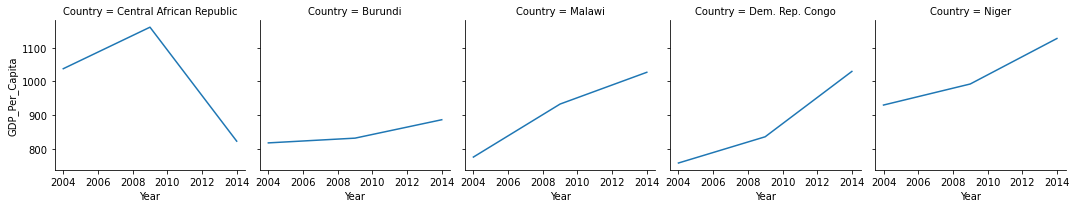

In [259]:
gdp_trend_bottom = sns.FacetGrid(bottom_5_gdp, col='Country')
gdp_trend_bottom.map(sns.lineplot, 'Year', 'GDP_Per_Capita')

33. Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

Answer: The main thing I found interesting is the Central African Republic's trend. The sharp drop in GDP per Capita for the Central African Republic can be explained by the Central African Republic Civil War, which caused nationwide strife and economic turmoil. 

Bonus: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

## Exploring New Database: Health Expenditures

In [320]:
health_df = pd.read_csv('../data/health_expenditure.csv', skiprows=1)
print(health_df.head(5))

   Region/Country/Area   Unnamed: 1  Year  \
0                    4  Afghanistan  2005   
1                    4  Afghanistan  2010   
2                    4  Afghanistan  2015   
3                    4  Afghanistan  2016   
4                    4  Afghanistan  2017   

                                  Series    Value Footnotes  \
0  Current health expenditure (% of GDP)   9.9483       NaN   
1  Current health expenditure (% of GDP)   8.5697       NaN   
2  Current health expenditure (% of GDP)  10.1053       NaN   
3  Current health expenditure (% of GDP)  10.9620       NaN   
4  Current health expenditure (% of GDP)  11.7772       NaN   

                                              Source  
0  World Health Organization (WHO), Geneva, WHO G...  
1  World Health Organization (WHO), Geneva, WHO G...  
2  World Health Organization (WHO), Geneva, WHO G...  
3  World Health Organization (WHO), Geneva, WHO G...  
4  World Health Organization (WHO), Geneva, WHO G...  


In [321]:
health_df = health_df.drop(columns=['Region/Country/Area','Footnotes', 'Source'])
print(health_df.head(5))

    Unnamed: 1  Year                                 Series    Value
0  Afghanistan  2005  Current health expenditure (% of GDP)   9.9483
1  Afghanistan  2010  Current health expenditure (% of GDP)   8.5697
2  Afghanistan  2015  Current health expenditure (% of GDP)  10.1053
3  Afghanistan  2016  Current health expenditure (% of GDP)  10.9620
4  Afghanistan  2017  Current health expenditure (% of GDP)  11.7772


In [322]:
health_df = health_df.rename(columns={'Unnamed: 1': 'Country', 'Series': 'Expenditure Type', 'Value': 'Health_Pct_GDP'})
print(health_df.head(25))

        Country  Year                                   Expenditure Type  \
0   Afghanistan  2005              Current health expenditure (% of GDP)   
1   Afghanistan  2010              Current health expenditure (% of GDP)   
2   Afghanistan  2015              Current health expenditure (% of GDP)   
3   Afghanistan  2016              Current health expenditure (% of GDP)   
4   Afghanistan  2017              Current health expenditure (% of GDP)   
5   Afghanistan  2005  Domestic general government health expenditure...   
6   Afghanistan  2010  Domestic general government health expenditure...   
7   Afghanistan  2015  Domestic general government health expenditure...   
8   Afghanistan  2016  Domestic general government health expenditure...   
9   Afghanistan  2017  Domestic general government health expenditure...   
10      Albania  2000  Domestic general government health expenditure...   
11      Albania  2005  Domestic general government health expenditure...   
12      Alba

Decided I only wanted current health expenditures rather than both current and general government, so I filtered those out below:

In [323]:
health_df = health_df[health_df['Expenditure Type'].str.startswith('C')]

Now I'll join the internet and GDP data to the health expenditures data.

In [324]:
gdp_and_internet_use_health = pd.merge(gdp_and_internet_use,health_df,on=['Country', 'Year'], how='outer')

In [325]:
print(gdp_and_internet_use_health.head(15))

        Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
0   Afghanistan  2019     2065.036398                 NaN   
1   Afghanistan  2018     2033.779002                 NaN   
2   Afghanistan  2017     2058.383832                 NaN   
3   Afghanistan  2016     2057.062164                 NaN   
4   Afghanistan  2015     2068.265904                 NaN   
5   Afghanistan  2014     2102.385234            6.390000   
6   Afghanistan  2013     2116.465454            5.900000   
7   Afghanistan  2012     2075.491747            5.454545   
8   Afghanistan  2011     1904.559799            5.000000   
9   Afghanistan  2010     1957.029338            4.000000   
10  Afghanistan  2009     1758.904043            3.550000   
11  Afghanistan  2008     1484.114729            1.840000   
12  Afghanistan  2007     1460.826075            1.900000   
13  Afghanistan  2006     1315.789565            2.107124   
14  Afghanistan  2005     1286.793508            1.224148   

                       

I don't need the "Expenditure Type" column anymore, so I'll drop that and the dataframe should be fully cleaned up.I'll print to make sure, though.

In [327]:
gdp_and_internet_use_health = gdp_and_internet_use_health.drop(columns=['Expenditure Type'])
print(gdp_and_internet_use_health.head(15))

        Country  Year  GDP_Per_Capita  Internet_Users_Pct  Health_Pct_GDP
0   Afghanistan  2019     2065.036398                 NaN             NaN
1   Afghanistan  2018     2033.779002                 NaN             NaN
2   Afghanistan  2017     2058.383832                 NaN         11.7772
3   Afghanistan  2016     2057.062164                 NaN         10.9620
4   Afghanistan  2015     2068.265904                 NaN         10.1053
5   Afghanistan  2014     2102.385234            6.390000             NaN
6   Afghanistan  2013     2116.465454            5.900000             NaN
7   Afghanistan  2012     2075.491747            5.454545             NaN
8   Afghanistan  2011     1904.559799            5.000000             NaN
9   Afghanistan  2010     1957.029338            4.000000          8.5697
10  Afghanistan  2009     1758.904043            3.550000             NaN
11  Afghanistan  2008     1484.114729            1.840000             NaN
12  Afghanistan  2007     1460.826075 

I decided a scatterplot would be the easiest way to visualize the relationship between health spending and GDP, so I made one below. Above, I used the sns regplot because I wanted a trendline, but this time I wanted to try a different kind of scatterplot, so the below plot looks a bit different. 

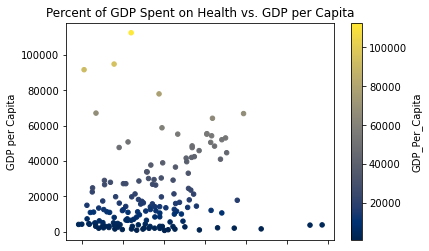

In [375]:
health_gdp_2017 = gdp_and_internet_use_health[gdp_and_internet_use_health['Year'].isin([2017])]
health_plot_2017 = health_gdp_2014.plot.scatter(x='Health_Pct_GDP',
                                      y='GDP_Per_Capita',
                                      c='GDP_Per_Capita',
                                    colormap='cividis',
                                    xlabel='Percent of GDP Spent on Health',
                                    ylabel='GDP per Capita',
                                    title = 'Percent of GDP Spent on Health vs. GDP per Capita')

Ultimately, this result is really interesting. There doesn't seem to be a super strong relationship between GDP per Capita and the percentage of GDP spent on health. I would imagine if the number for health spending was a sum total of money spent on health rather than a percentage that the relationship would be stronger.

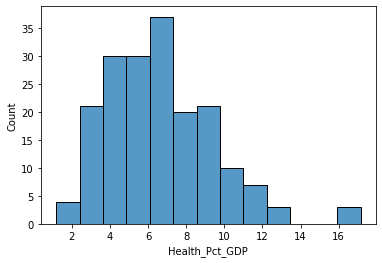

In [350]:
hist_2017 = sns.histplot(data=health_gdp_2017, x= 'Health_Pct_GDP')

As evidenced by the scatterplot, the distribution for health spending is kind of all over the place.

Now I'll do a quick scatterplot to visualize the relationship between Percent of GDP spent on health and internet usage. Looking at the dataframe, I noticed that the most recent year that contains both Internet and Health data is 2010, so the scatterplot below represents that data. I imagine the relationship will be relatively weak, as we saw above that the relationship between wealth and internet usage is middling at best, and the relationship between wealth and health expenditure is even weaker. It stands to reason, then, that the relationship between these two variables will be even more tenuous. 

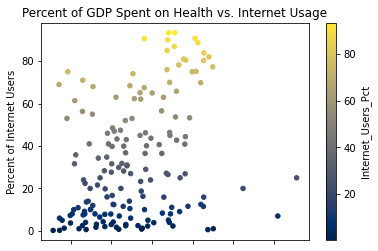

In [376]:
health_internet_2010 = gdp_and_internet_use_health[gdp_and_internet_use_health['Year'].isin([2010])]
health_plot_2010 = health_internet_2010.plot.scatter(x='Health_Pct_GDP',
                                      y='Internet_Users_Pct',
                                      c='Internet_Users_Pct',
                                    colormap='cividis',
                                    xlabel='Percent of GDP Spent on Health',
                                    ylabel='Percent of Internet Users',
                                    title = 'Percent of GDP Spent on Health vs. Internet Usage')

As expected, this relationship is very weak.